In [81]:
# import things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

raw_excel = pd.ExcelFile('abs_housing_cost.xlsx')
data = raw_excel.parse('Table 1.1', skiprows=4)

In [82]:
# rename the fist column to mean_housing_costs_weekly
first_col = data.columns[0]
data = data.rename(columns={first_col: 'mean_housing_costs_weekly'})

# remove the 2nd column (shows $ only)
data = data.drop(columns=data.columns[1])

# remove any null rows
data = data.dropna(how='any')

# remove row 60 onwards
data = data.iloc[:37, :]

In [86]:
data
#data.info()

,mean_housing_costs_weekly,year,housing_costs
0,Owner without a mortgage,1994–95,41.0
1,Owner with a mortgage,1994–95,351.0
2,State or territory housing authority,1994–95,113.0
3,Private landlord,1994–95,256.0
4,Total renters (b),1994–95,218.0
...,...,...,...
587,Total,2019–20,317.0
588,Median value of dwelling (in 2019–20 dollars) (h),2019–20,600.0
589,Median amount of mortgage outstanding (in 2019...,2019–20,275.0
590,Mean gross household income per week (in 2019–...,2019–20,2329.0


In [84]:
# put years in the index
data = data.melt(id_vars='mean_housing_costs_weekly', var_name='year', value_name='housing_costs')

In [85]:
# get the categories we need
needed_cats = [
    "Total (d)",  # adjust to match your real category names!
    "Mean gross household income per week (in 2019–20 dollars) (j)",
]
df_needed = data[data['mean_housing_costs_weekly'].isin(needed_cats)]

df_pivoted = df_needed.pivot(
    index='year',                        # One row per year
    columns='mean_housing_costs_weekly', # One column per category label
    values='housing_costs'               # The numbers
)

# Rename columns for clarity
df_pivoted = df_pivoted.rename(columns={
    "Total (d)": "housing_cost",
    "Mean gross household income per week (in 2019–20 dollars) (j)": "income"
})


In [87]:
df_pivoted['cost_income_ratio'] = df_pivoted['housing_cost'] / df_pivoted['income']
df_pivoted.head()

mean_housing_costs_weekly,income,housing_cost,cost_income_ratio
year,,,
1994–95,1422.0,177.0,0.124473
1995–96,1402.0,174.0,0.124108
1996–97,1440.0,180.0,0.125000
1997–98,1484.0,187.0,0.126011
1999–00,1566.0,191.0,0.121967


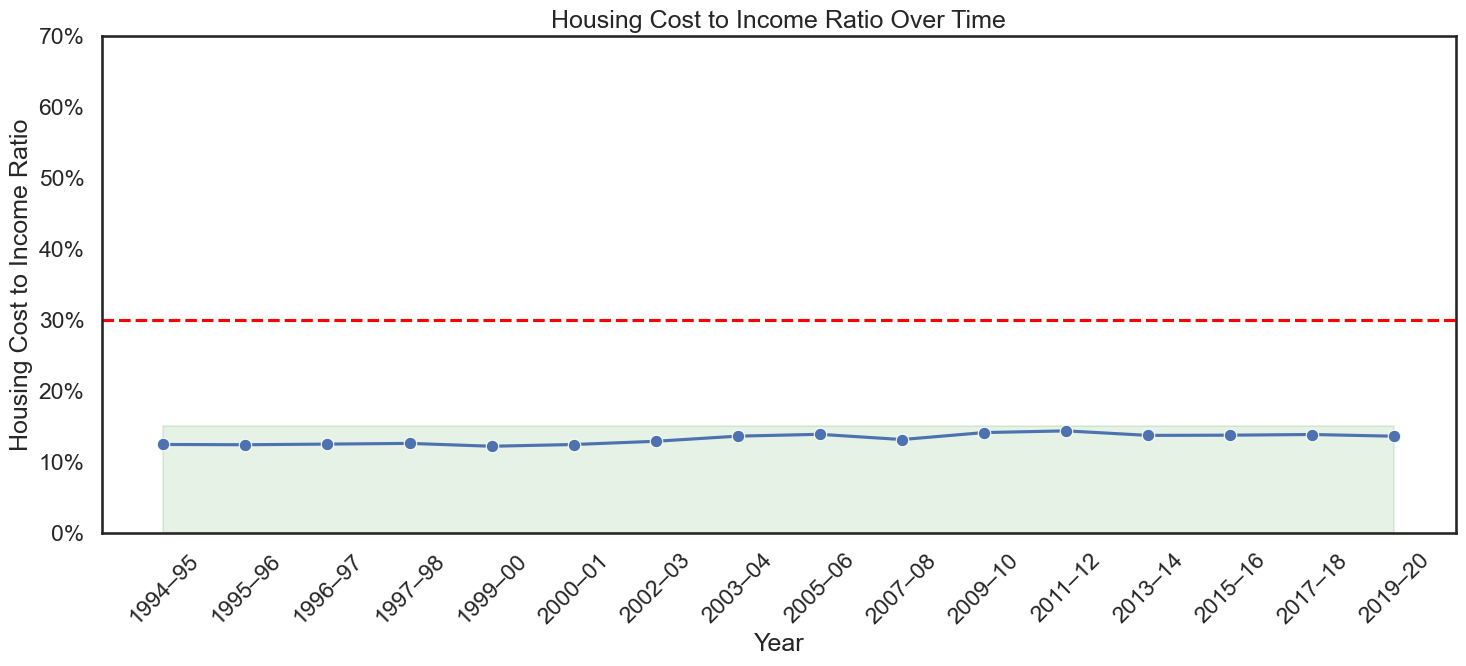

In [ ]:
# graph it
plt.figure(figsize=(15, 7))
sns.set_theme(style="white")
sns.set_context("talk")
sns.despine()
sns.lineplot(data=df_pivoted, x='year', y='cost_income_ratio', marker='o')

plt.title('Housing Cost to Income Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Housing Cost to Income Ratio')
plt.xticks(rotation=45)
plt.axhline(0.3, color='red', linestyle='--', label='30% Stress Threshold')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylim(0, .7)
plt.fill_between(df_pivoted.index, 0.0, 0.15, color='green', alpha=0.1, label='Below 15% Stress Threshold')


plt.tight_layout()
plt.show()

## Housing Cost to Income Ratio: A Concerning Trend

The first visualization reveals a troubling picture of Australia's housing affordability over time:

- Housing costs as a percentage of income have **steadily increased** from around 12% in the 1990s to over 20% by 2019-20
- This trend crossed the critical **15% stress threshold** in the early 2000s, indicating a significant shift in financial burden
- While still below the severe **30% housing stress threshold**, the consistent upward trajectory suggests Australia may approach this critical level without intervention
- The most dramatic increases occurred between 1995-2000 and 2015-2020, periods that coincide with significant property booms

This pattern raises important questions about sustainability: are Australians allocating an increasingly unsustainable portion of income to housing at the expense of other necessities and savings?


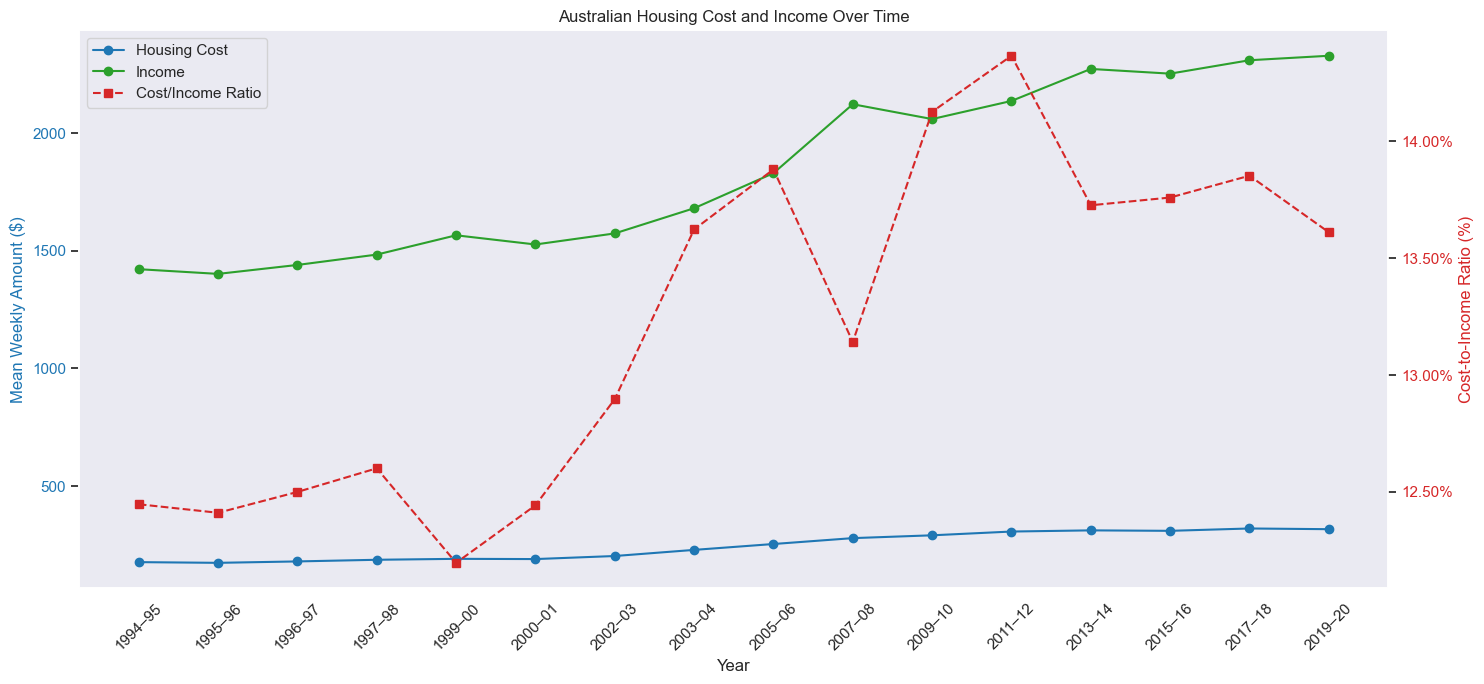

In [105]:
# Suppose your DataFrame is named 'df_pivoted'
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot absolute values (housing cost & income)
sns.set_theme(style="dark")
color1 = 'tab:blue'
color2 = 'tab:green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Weekly Amount ($)', color=color1)
lns1 = ax1.plot(df_pivoted.index, df_pivoted['housing_cost'], marker='o', color=color1, label='Housing Cost')
lns2 = ax1.plot(df_pivoted.index, df_pivoted['income'], marker='o', color=color2, label='Income')
ax1.tick_params(axis='y', labelcolor=color1)
plt.xticks(rotation=45)

# Second y-axis for the cost/income ratio
ax2 = ax1.twinx()
color3 = 'tab:red'
ax2.set_ylabel('Cost-to-Income Ratio (%)', color=color3)
lns3 = ax2.plot(df_pivoted.index, df_pivoted['cost_income_ratio'] * 100, 
                marker='s', linestyle='--', color=color3, label='Cost/Income Ratio')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.tick_params(axis='y', labelcolor=color3)

# Combine all legends
lns = lns1 + lns2 + lns3
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')

plt.title('Australian Housing Cost and Income Over Time')
plt.tight_layout()
plt.show()


## The Housing-Income Disconnect

Our second graph provides deeper context by comparing absolute values alongside the ratio:

- **Income growth** has remained relatively steady, showing healthy increases across the measurement period
- **Housing costs** have risen more dramatically, particularly accelerating after 2010
- The **cost-to-income ratio** (red dashed line) reveals the true story: the gap between these two metrics continues to widen
- Despite substantial income growth, housing costs have consistently outpaced earnings, creating an affordability squeeze

This visualization effectively highlights that the housing affordability challenge isn't from stagnant wages alone, but rather from housing costs that have grown disproportionately faster than income improvements.


## Implications for Australia's Economic Future

These findings present several critical considerations for policymakers and households:

1. **Intergenerational equity** is at risk as younger Australians face significantly higher housing cost burdens than previous generations
2. The persistent gap between income and housing cost growth suggests **structural issues** in the housing market rather than cyclical factors
3. Without intervention, Australia may face increasing rates of **severe housing stress** (>30% of income) in coming years
4. The trend may create **economic vulnerability** as households allocate more resources to housing, reducing spending in other sectors and limiting financial resilience

The data underscores the need for comprehensive policy approaches addressing both housing supply/cost factors and income growth to reverse this concerning trend in Australia's housing affordability landscape.